**Milestone 2 Phase 1**
Rahmad Gunawan
FTDS-Batch 013

![Say Haii](https://img.freepik.com/premium-photo/customer-churn-rate-concept-client-attrition_556904-358.jpg?w=1480fit=fill&w=500&h=500))

Sumber gambar : [freepik.com](https://img.freepik.com/premium-photo/customer-churn-rate-concept-client-attrition_556904-358.jpg?w=1480)


# **I.Perkenalan**

Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1.

**Deskripsi :** 
Dataset yang digunakan pada project ini adalah dataset yang berisi informasi tentang *Churn Prediction* untuk memprediksi perilaku dalam mempertahankan pelanggan , dimana pada dataset ini terdapat beberapa informasi terkait , pelanggan yang memiliki akses untuk menggunakan layanan *phone, multiple lines, internet, online security, online backup, device protection*, serta Informasi akun pelanggan – sudah berapa lama mereka menjadi pelanggan, kontrak, metode pembayaran, tagihan tanpa kertas, tagihan bulanan, dan total tagihan dan juga terdapat informasi Info demografis tentang pelanggan – jenis kelamin, rentang usia, dan jika mereka memiliki pasangan dan tanggungan.

**Objektif :**
Graded Challenge 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
1. Mampu memahami konsep supervised learning dan unsupervised learning
2. Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
3. Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
4. Mampu melakukan evaluasi model
5. Mampu melakukan model tuning
6. Mampu melakukan model deployment

**Dataset :**
Keterangan kolom pada dataset ini adalah:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Contains customer ID</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>whether the customer female or male</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Whether the customer is a senior citizen or not (1, 0)</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Whether the customer has a partner or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Whether the customer has dependents or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Number of months the customer has stayed with the company</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Whether the customer has a phone service or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Whether the customer has multiple lines r not (Yes, No, No phone service)</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Customer’s internet service provider (DSL, Fiber optic, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Whether the customer has online security or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Whether the customer has online backup or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Whether the customer has device protection or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Whether the customer has tech support or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Whether the customer has streaming TV or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Whether the customer has streaming movies or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>The contract term of the customer (Month-to-month, One year, Two year)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Whether the customer has paperless billing or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>The amount charged to the customer monthly </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>The total amount charged to the customer </td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Whether the customer churned or not (Yes or No)</td>
<td>categorical</td>
</tr>
</tbody>
</table>

# **II. Import Libraries**

**Library yang digunakan adalah Numpy, Pandas, Sklearn, Scipy, Plotly, Seaborn**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# For Unsupervised Clustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearnex import patch_sklearn #untuk mempercepat model
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
import pickle

sns.set_theme(style='darkgrid', palette='deep')

%matplotlib inline

# **III. Data Loading**

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll

### **B. Menyimpan Data**

Data yang sudah diakses kemudian disimpan dengan nama file **'h8dsft_M2P1_Rahmad-Gunawan.csv'** Untuk untuk kemudian data tersebut diload

### **C. *Data Loading***

In [2]:
data = pd.read_csv("h8dsft_M2P1_Rahmad-Gunawan.csv")
pd.set_option("display.max.columns",None) # digunakan untuk menampilkan keseluruhan kolom pada dataset
pd.set_option('display.max_row', 10)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Menampilkan Head dan Tail**

In [3]:
data.head() #menampilkan 5 data teratas

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()  #menampilkan 5 data terbawah

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# check missing values dalam dataset
pd.set_option('display.max_row', 21)
data.isna().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

### **D. *Data Characteristic***

Tahapan ini merupakan salah satu **Tahapan Penting**, mengapa penting ? dikarenakan, jika kita tidak mengetetahui apa saja isi dari dataset yang kita loading, dan informasi dasar apa yang dapat kita ketahui, nantinya kita akan bingung untuk mengolah/menganalisa datanya, oleh karena itu kita perlu berkenalan dahulu dengan dataset tersebut. Tahapan ini juga digunakan untuk mengetahui gambaran secara umum tentang dataset, dimana kita dapat mengetahui jumlah row pada dataset, dan jumlah kolom.

In [6]:
data.shape

(7043, 21)

In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
data.info() # Hanya untuk memberikan informasi jenis tipe data dan terdapat kolom apa saja pada dataset tersebut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.duplicated().sum() # mengecek apakah terdapat duplikasi pada dataset yang diload

0

In [10]:
data.describe().T # melihat gambaran singkat terkait dataset

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


***Insight* Data Awal**

Dari Informasi dasar ini dapat diketahui dataframe ini terdiri dari 21 kolom yang terdiri atas:
- 2 kolom dengan tipe integer
- 1 kolom dengan tipe float
- 18 kolom bertipe object

Dapat diketahui juga pada dataset tersebut **tidak terdapat missing value**, pada dataset ini terdapat informasi apakah pelanggan kemungkinan akan churn atau tidak , feature churn tersebut dijadikan target dalam dataset ini, serta terdapat informasi lainnya pada masing-masing feature diantaranya adalah tagihan bulanan, gender pengguna, akses terhadap fasilitas seperti telephone, internet dll, keseluruhan kolom tersebut nantinya akan digunakan untuk memprediksi apakah pengguna tersebut memiliki potensi untuk churn ataut tidak, Pada Dataset ini sebagian besar memiliki feature terdiri atas tipe kategorik oleh karena itu untuk menguji terkait keterkaitan kolom kategorik dan dapat menggunakan uji Chi Square, dan juga terdapat informasi bahwa Pada kolom TotalCharges masih berbentuk object sehingga harus diubah bentuk typenya menjadi float/int serta kita dapat menghapus kolom customerID dikarenakan pada kolom tersebut tidak dibutuhkan. 

**Drop Kolom Id**

In [11]:
data.drop('customerID', axis=1, inplace=True)

**Mengubah bentuk data Total Charges ke float**

In [12]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
data_copy = data.copy() # membuat copy pada dataset

In [15]:
#Convertin the predictor variable in a binary numeric variable
data_copy['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data_copy['Churn'].replace(to_replace='No',  value=0, inplace=True)

# **IV. *Exploratory Data Analysis (EDA)***

Tahapan ini dilakukan untuk mengenal lebih dalam terkait masing-masing *feature* serta untuk dapat memberikan gambaran dasar secara umum feature-feature apa saja saling berkorelasi

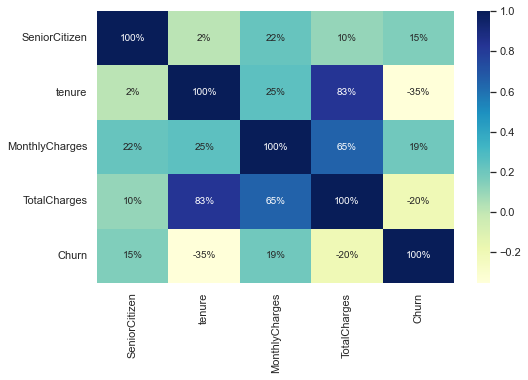

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(data_copy.corr(), annot=True,mask=None, cmap='YlGnBu',fmt='.0%', )
plt.show()

**Berdasarkan Heat Map diatas kita dapat melihat bahwa terdapat beberapa cluster feature yang memiliki korelasi yang cukup kuat, yaitu, Variabel *tenure* memiliki korelasi yang paling kuat terhadap variabel *Churn*, variabel kemudian feature lainnya yang memiliki korelasi cukup kuat adalah total charge, jika kita lihat secara umum, keseluruhan feature pada data yang bertipe kategorik tersebut memiliki korelasi terhadap feature *Churn* oleh karena itu keseluruhan feature tersebut dapat tetap dipertahankan, dan kemudian untuk lebih memastikan korelasi pada setiap feature tersebut, maka akan dilakukan EDA pada setiap feature tersebut.**

**Melihat tipe data/pengelompokan masing masing kolom**

In [17]:
# Mengidentifikasi kolom kategori dan kolom numerikal pada data
num_columns = data.select_dtypes(include=np.number).columns.tolist() # mengelompokan kolom bertipe numerik
cat_columns = data.select_dtypes(include=['object']).columns.tolist() # mengelompokan kolom bertipe kategorik

print('Numerical Columns   : ', num_columns)
print(f'\n') # digunakan untuk list kolom numerik dan kolom kategori
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Berdasarkan identifikasi diatas kita mendapatkan bahwa terdapat banyak kolom kategori pada dataset tersebut, sementara pada keseluruhan kolom yang berjenis numerikal hanya terdapat 4 kolom, terdapat pula beberapa kolom kategorik yang sebenarnya adalah kolom dengan jenis kategorikal, namun formatnya secara keseluruhan sudah diubah bentuknya menjadi numerik.

Tahapan selanjutnya adalah kita akan menganalisa masing-masing feature yang terdapat pada dataset, dan melihat korelasinya terhadap kolom target, untuk lebih memudahkan proses EDA, kita juga akan mengelompokan beberapa kolom yang memiliki karakteristik yang sejenis, sehingga proses EDA dapat dilakukan secara bersamaan

## ***1. EDA* Kolom Target *(Churn)***

In [18]:
fig = px.pie(data['Churn'].value_counts().reset_index().rename(columns={'index':'Type'}), values='Churn', names='Type', title='Churn (Target) Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
print("### pada kolom Target distribusinya Imbalanced")

### pada kolom Target distribusinya Imbalanced


berdasarkan informasi diatas pada kolom target distribusinay tidak merata, sehingga nantinya perlu dilakukan handling pada feature tersebut yaitu dengan melakukan SMOTE sebelum kita menguji data train dan test.

## ***2. EDA pada kolom Numerik***

pada tahapan ini kita akan melihat korelasi antara feature yang bertipe numerik dengan kolom target, yaitu pada feature 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', namun untuk `Feature Senior Citizen` akan dimasukan kedalam EDA pada kolom kategorik dikarenakan isi/value pada kolom tersebut merupakan kolom kategorik

### ***A. EDA pada Feature tenure***

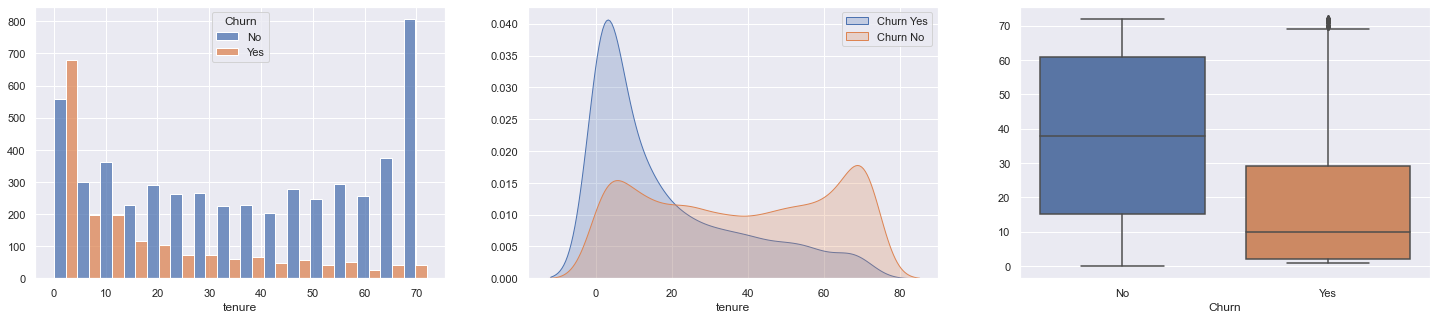

In [19]:
plt.figure(figsize=(25,5))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x="tenure", hue="Churn", multiple="dodge")
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.subplot(1, 3, 2)
sns.kdeplot(data.loc[(data['Churn'] == 'Yes'), 'tenure'], label = 'Churn Yes', shade = True)
sns.kdeplot(data.loc[(data['Churn'] == 'No'), 'tenure'], label = 'Churn No', shade = True)
plt.ylabel('')
plt.legend()
plt.subplot(1, 3, 3)
sns.boxplot(x = data.Churn, y = data.tenure)
plt.ylabel('')
plt.show()

Text(0, 0.5, 'Proportion of population')

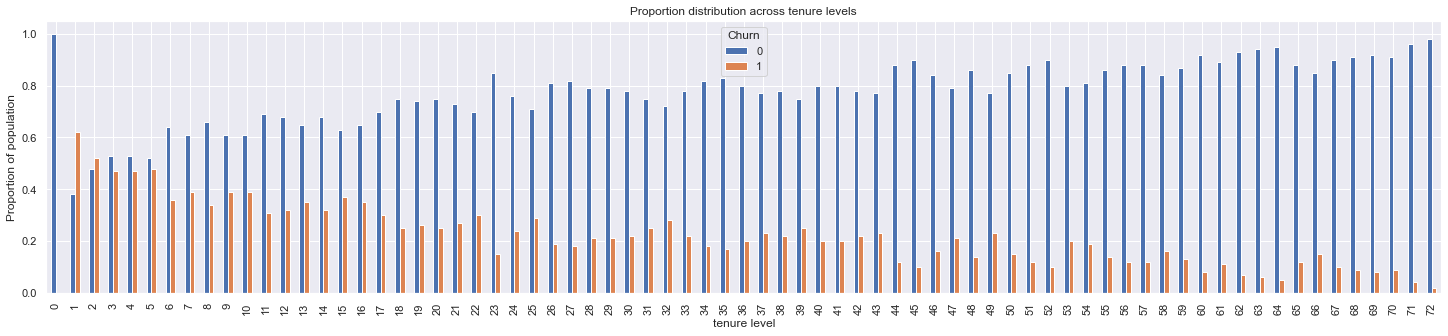

In [20]:
tenure = round(pd.crosstab(data.tenure, data_copy.Churn).div(pd.crosstab(data.tenure, data_copy.Churn).apply(sum,1),0),2)
tenure.sort_values(by='tenure', ascending = True)
ax = tenure.plot(kind ='bar', title = 'Proportion distribution across tenure levels', figsize = (25,5))
ax.set_xlabel('tenure level')
ax.set_ylabel('Proportion of population')

semakin rendah tenure makin semakin tinggi tingkat churn dan untuk tingkat tenure yang tinggi tingkat churnya cenderung menurun, pengguna-pengguna baru cenderung potensial churn dibandingkan dengan pengguna lama, berdasarkan hasil EDA tersebut didapatkan bahwa feature tenure memiliki korelasi terhadap feature Churn 

### ***B. EDA Feature Monthly Charges***

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


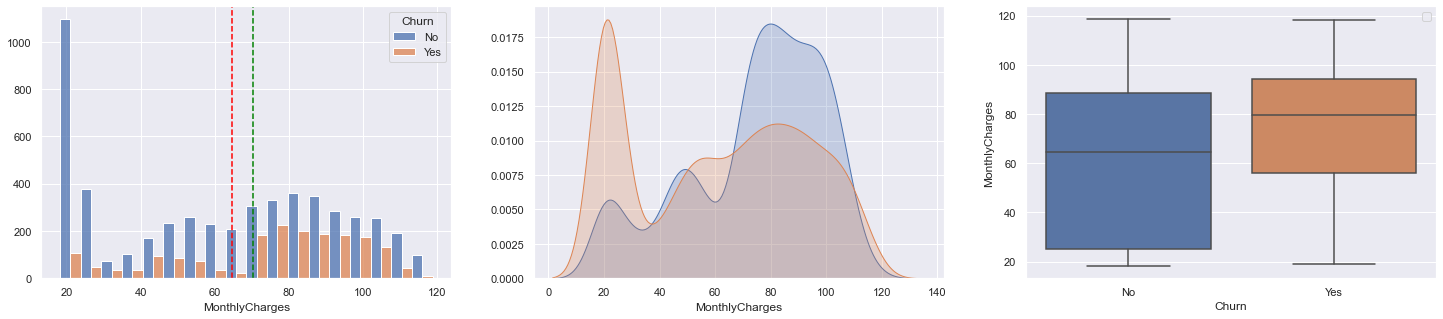

In [21]:
plt.figure(figsize=(25,5))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x="MonthlyCharges", hue="Churn", multiple="dodge")
plt.axvline(x=data.MonthlyCharges.mean(), color='red', linestyle='--', label='Mean') 
plt.axvline(x=data.MonthlyCharges.median(), color='green', linestyle='--', label='Median')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.subplot(1, 3, 2)
sns.kdeplot(data.loc[(data['Churn'] == 'Yes'), 'MonthlyCharges'], label = 'Churn Yes', shade = True)
sns.kdeplot(data.loc[(data['Churn'] == 'No'), 'MonthlyCharges'], label = 'Churn No', shade = True)
plt.ylabel('')
plt.subplot(1, 3, 3)
sns.boxplot(x = data.Churn, y = data.MonthlyCharges)
plt.legend()
plt.show()

Feature monthly charge memiliki korelasi terhadap feature churn, dimana pada customer yang potensial churn memiliki nilai rata/rata monthly charge yang lebih tinggi dibandingkan dengan customer yang tidak memiliki potensi churn, dalam artian semakin tinggi monthly charge setiap pengguna maka potensi kehilangan customer tersebut akan semakin tinggi

### ***C. EDA Feature Total Charges***

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


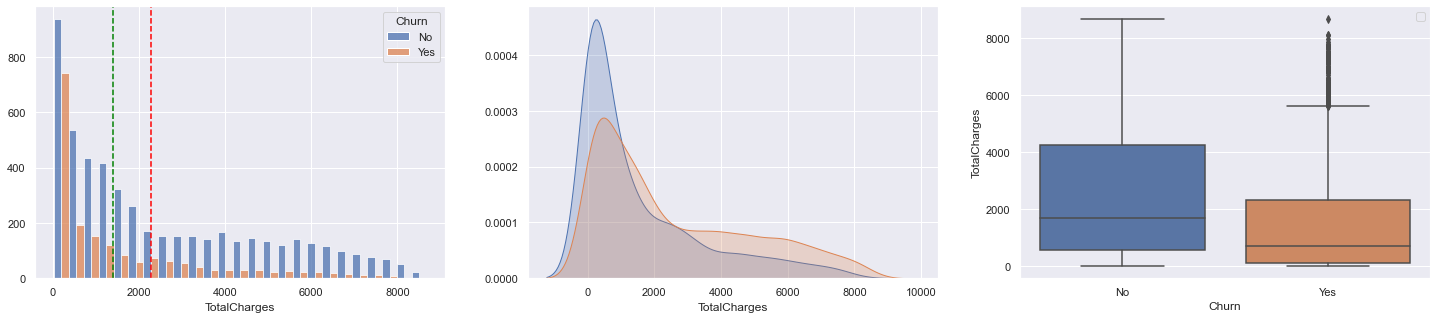

In [22]:
plt.figure(figsize=(25,5))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x="TotalCharges", hue="Churn", multiple="dodge")
plt.axvline(x=data.TotalCharges.mean(), color='red', linestyle='--', label='Mean') 
plt.axvline(x=data.TotalCharges.median(), color='green', linestyle='--', label='Median')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.subplot(1, 3, 2)
sns.kdeplot(data.loc[(data['Churn'] == 'Yes'), 'TotalCharges'], label = 'Churn Yes', shade = True)
sns.kdeplot(data.loc[(data['Churn'] == 'No'), 'TotalCharges'], label = 'Churn No', shade = True)
plt.ylabel('')
plt.subplot(1, 3, 3)
sns.boxplot(x = data.Churn, y = data.TotalCharges)
plt.legend()
plt.show()

jika kita lihat berdasarkan visualisasi data diatas, pada feature total charge, kehilangan customer dapat terjadi pada customer yang memiliki total charge rendah, sangat berbanding terbalik jika kita bandingkan dengan feature monthly charge, saya berasumsi bahwa rendahnya total charge tersebut diakibatkan oleh, pengguna tersebut hanya berlangganan beberapa layanan saja, atau tanpa adanya tambahan fitur lainnya , sehingga total chargenya menjadi lebih rendah, atau juga diakibatkan customer tersebut hanya berlangganan dalam tempo yang singkat. dapat kita simpulkan bahwa feature total charge memiliki korelasi terhadap feature churn.

## ***3. EDA pada kolom Kategorik***

### ***A. EDA Feature Gender,Senior Citizen dan Partner***

In [23]:
fig = px.pie(data['gender'].value_counts().reset_index().rename(columns={'index':'Type'}), values='gender', names='Type', title='gender Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
print("### pada kolom gender distribusinya merata ")

### pada kolom gender distribusinya merata 


In [24]:
fig = px.pie(data['SeniorCitizen'].value_counts().reset_index().rename(columns={'index':'Type'}), values='SeniorCitizen', names='Type', title='SeniorCitizen Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

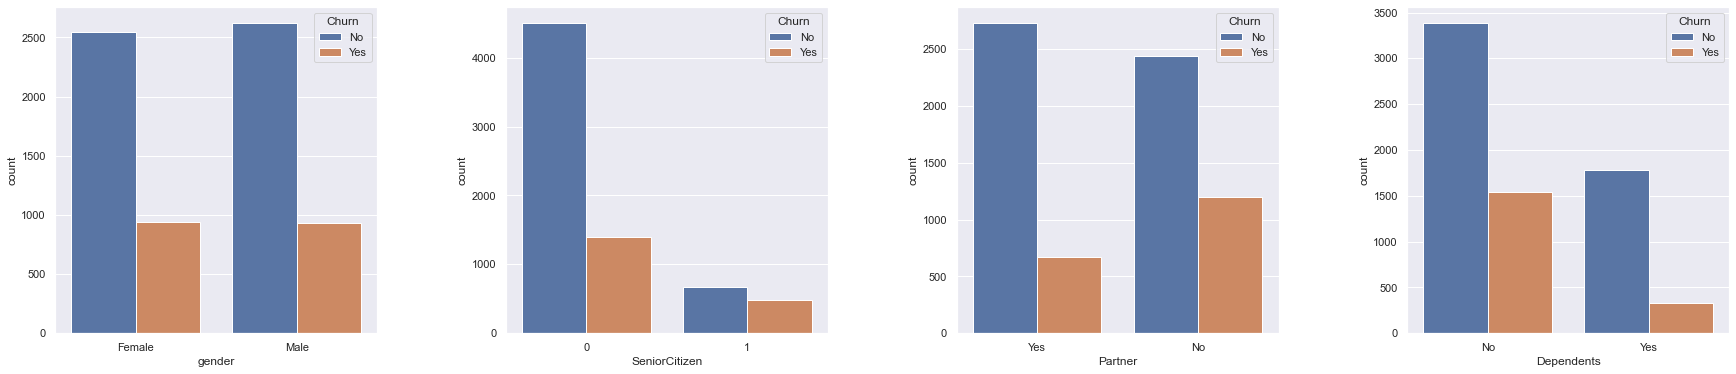

In [25]:
fig, ax = plt.subplots(1,4, figsize=(30, 6))
plt.subplots_adjust(wspace=0.4)
sns.countplot(x = "gender", hue="Churn" , ax=ax[0], data=data)
sns.countplot(data = data, x = "SeniorCitizen", ax=ax[1], hue="Churn")
sns.countplot(data = data, x = "Partner", ax=ax[2], hue="Churn")
sns.countplot(data = data, x = "Dependents", ax=ax[3], hue="Churn")
fig.show()

Gender yang menjadi customer pada dataset ini terdistribusi merata, dimana perbandingan antara pengguna pria dan wanita, jumlahnya hampir sama, didapatkan juga informasi bahwa kebanyakan hilangnya customer (Churn) terjadi pada customer yang tidak memiliki pasangan, sementara pada customer yang memiliki pasangan kecenderungan churnya lebih rendah. dan juga terdapat informasi bahwa kebanyakan pengguna bukan merupakan kalangan tua/senior citizen hal tersebut dapat dilihat dari jumlah perbandingan antara senior citizen dan non senior citizen, pada feature tersebut juga, didapatkan bahwa, pada pengguna kalangan "Senior Citizen" lebih berpotensi dalam kehilangan customer/churn. 

### ***D. EDA Feature PhoneService, MultipleLines,InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport dan StreamingTV***

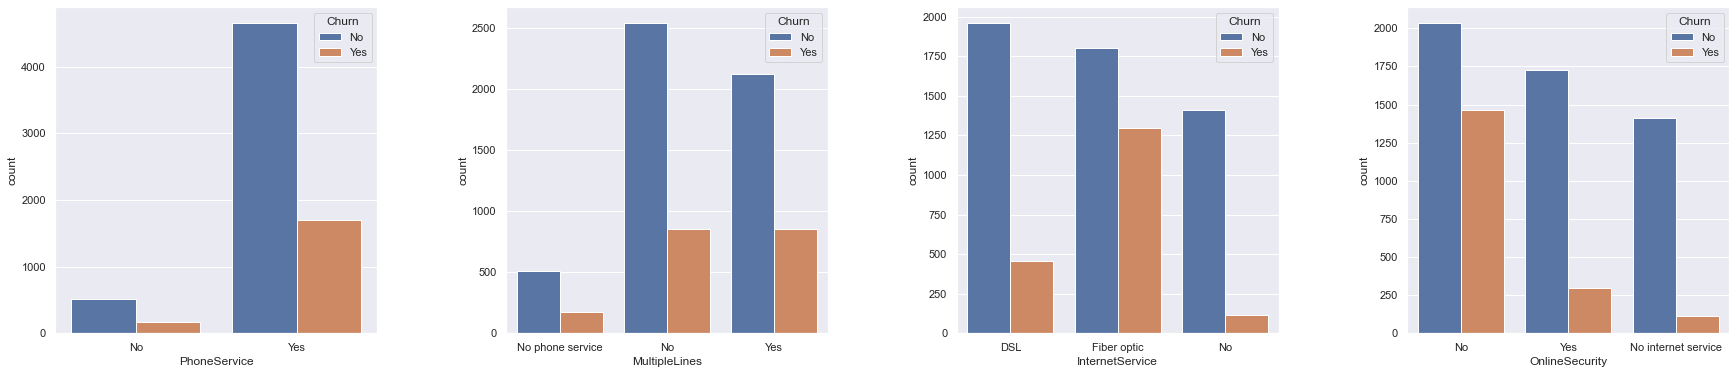

In [26]:
fig, ax = plt.subplots(1,4, figsize=(30, 6))
plt.subplots_adjust(wspace=0.4)
sns.countplot(x = "PhoneService", hue="Churn" , ax=ax[0], data=data)
sns.countplot(data = data, x = "MultipleLines", ax=ax[1], hue="Churn")
sns.countplot(data = data, x = "InternetService", ax=ax[2], hue="Churn")
sns.countplot(data = data, x = "OnlineSecurity", ax=ax[3], hue="Churn")
fig.show()

Terdapat beberapa insight dapat kita ambil pada feature diatas diantaranya adalah, Kehadiran layanan telepon dan dukungan teknis lainnya memainkan peran penting dalam mencegah terjadinya churn pelanggan, pada Pelanggan dengan layanan DSL secara proporsional kemungkinannya untuk kehilangan customer/churn lebih kecil dibandingkan pengguna yang menggunakan serat optik, dan juga pada penggunan yang tidak memiliki layanan online security memiliki potensi churn yang jauh lebih tinggi. 

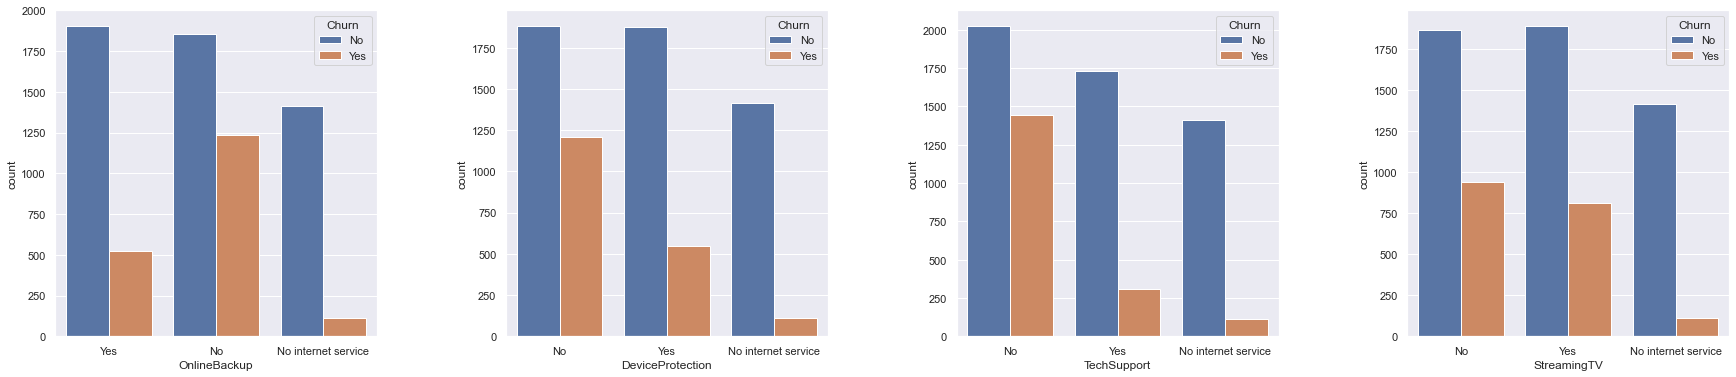

In [27]:
fig, ax = plt.subplots(1,4, figsize=(30, 6))
plt.subplots_adjust(wspace=0.4)
sns.countplot(x = "OnlineBackup", hue="Churn" , ax=ax[0], data=data)
sns.countplot(data = data, x = "DeviceProtection", ax=ax[1], hue="Churn")
sns.countplot(data = data, x = "TechSupport", ax=ax[2], hue="Churn")
sns.countplot(data = data, x = "StreamingTV", ax=ax[3], hue="Churn")
fig.show()

Pengguna yang tidak memiliki layanan akses internet cenderung memiliki persentase churn yang lebih rendah, pengguna yang memiliki akses layanan online backup tingkat churn-nya cenderung lebih rendah dibandingkan pengguna yang tidak memiliki layanan online backup, hal tersebut juga terjadi pada feature device protection dan tech support. dapat disimpulkan bahwa dukungan pelanggan/fitur tambahan merupakan tindakan yang baik untuk mencegah perusahaan kehilangan pelanggan/churn. fitur tambahan tersebut juga dapat memungkinkan menarik lebih banyak pelanggan

### ***E. EDA Feature StreamingMovies, Contract, PaperlessBilling, dan PaymentMethod***

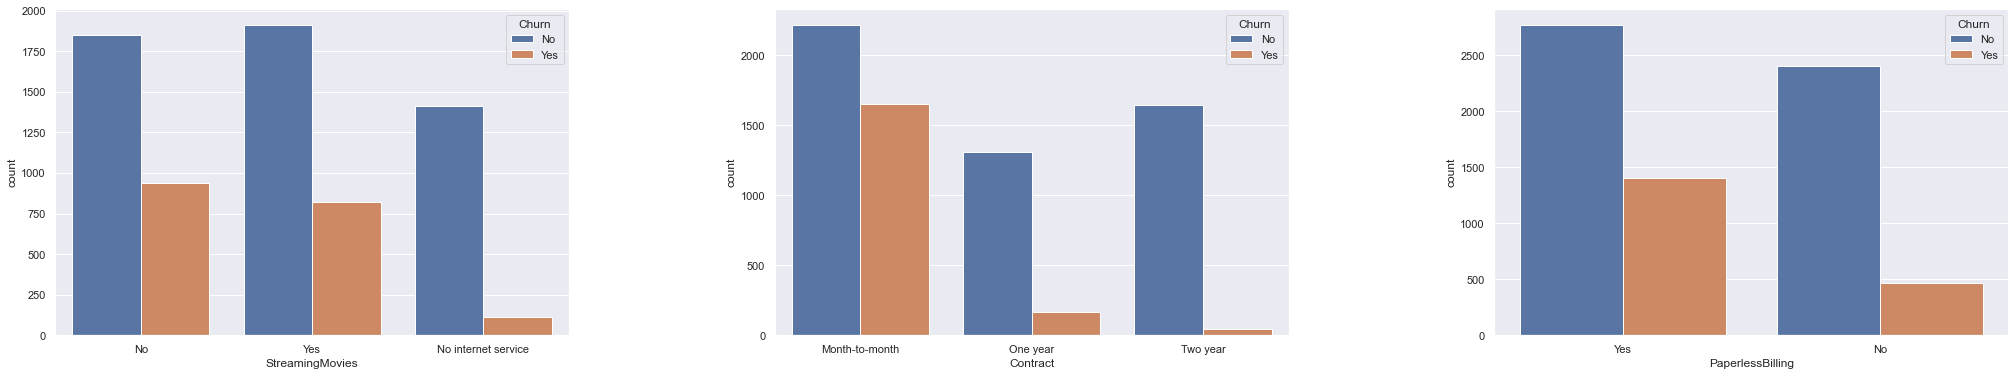

In [28]:
fig, ax = plt.subplots(1,3, figsize=(35, 6))
plt.subplots_adjust(wspace=0.4)
sns.countplot(x = "StreamingMovies", hue="Churn" , ax=ax[0], data=data)
sns.countplot(data = data, x = "Contract", ax=ax[1], hue="Churn")
sns.countplot(data = data, x = "PaperlessBilling", ax=ax[2], hue="Churn")
fig.show()

Pada pelanggan yang memiliki akses/berlangganan streaming movie kemungkinan churnya cenderung lebih rendah dibandingkan pelanggan yang tidak memiliki akses pada layanan tersebut, jika kita lihat berdasarkan feature kontrak, pelanggan dengan kontrak month-to-month memiliki tingkat churn yang jauh sangat tinggi dibandingkan dengan pelanggan yang memilik kontrak dengan periode lebih lama, dapat disimpulkan bahwa Kontrak jangka pendek memiliki tingkat churn yang lebih tinggi dibandingkan kontrak panjang, atau semakin lama jangka kontrak pengguna maka semakin rendah tingkat churn-nya. dan pada feature Paperless biling didapatkan informasi bahwa pelanggan dengan tagihan tanpa kertas (online)/paperless biling lebih mungkin melakukan churn. secara keseluruhan ketiga feature tersebut sangat memiliki korelasi terhadap feature target.

### ***F. EDA Feature PaymentMethod***

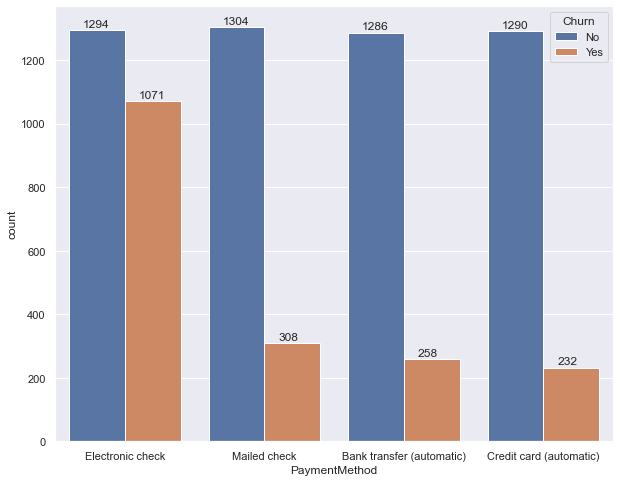

In [29]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.countplot(x='PaymentMethod',hue='Churn',data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+10))
plt.show()

Berdasarkan informasi diatas Metode pembayaran yang paling disukai adalah cek elektronik dengan sekitar 35% pelanggan. Metode ini juga memiliki tingkat churn yang sangat tinggi dibandingkan metode pembayaran melalui bank transfer ataupun credit card

### ***G. Melihat Korelasi Antara Feature Kategorik dan Feature Target***

pada tahapan ini kita akan menggunakan uji chisquare untuk menentukan bahwa apakah feature tersebut memiliki korelasi terhadap feature target atau tidak, dengan menggunakan nilai alpha 0,05

In [30]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} MEMILIKI korelasi terhadap feature target (Churn) ".format(colX)
        else:
            result="{0} TIDAK memiliki korelasi terhadap feature target (Churn). (Feature {0} dapat dihapuskan)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

df = data
#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
for var in cat_columns:
    cT.TestIndependence(colX=var,colY="Churn" ) 

gender TIDAK memiliki korelasi terhadap feature target (Churn). (Feature gender dapat dihapuskan)
Partner MEMILIKI korelasi terhadap feature target (Churn) 
Dependents MEMILIKI korelasi terhadap feature target (Churn) 
PhoneService TIDAK memiliki korelasi terhadap feature target (Churn). (Feature PhoneService dapat dihapuskan)
MultipleLines MEMILIKI korelasi terhadap feature target (Churn) 
InternetService MEMILIKI korelasi terhadap feature target (Churn) 
OnlineSecurity MEMILIKI korelasi terhadap feature target (Churn) 
OnlineBackup MEMILIKI korelasi terhadap feature target (Churn) 
DeviceProtection MEMILIKI korelasi terhadap feature target (Churn) 
TechSupport MEMILIKI korelasi terhadap feature target (Churn) 
StreamingTV MEMILIKI korelasi terhadap feature target (Churn) 
StreamingMovies MEMILIKI korelasi terhadap feature target (Churn) 
Contract MEMILIKI korelasi terhadap feature target (Churn) 
PaperlessBilling MEMILIKI korelasi terhadap feature target (Churn) 
PaymentMethod MEMILI

**Berdasarkan hasil uji chisquare tersebut didapatkan bahwa `feature gender dan phone service tidak memiliki korelasi terhadap feature target`, sehingga pada feature tersebut dapat dihapuskan**

### ***H. Melihat Korelasi Antara Feature Kategorik dan Feature Target menggunakan Heatmap***

Setelah mengetahui antara korelasi pada feature kategorik dan target kita juga dapat memastikan korelasi masing-masing feature tersebut menggunakan heat map

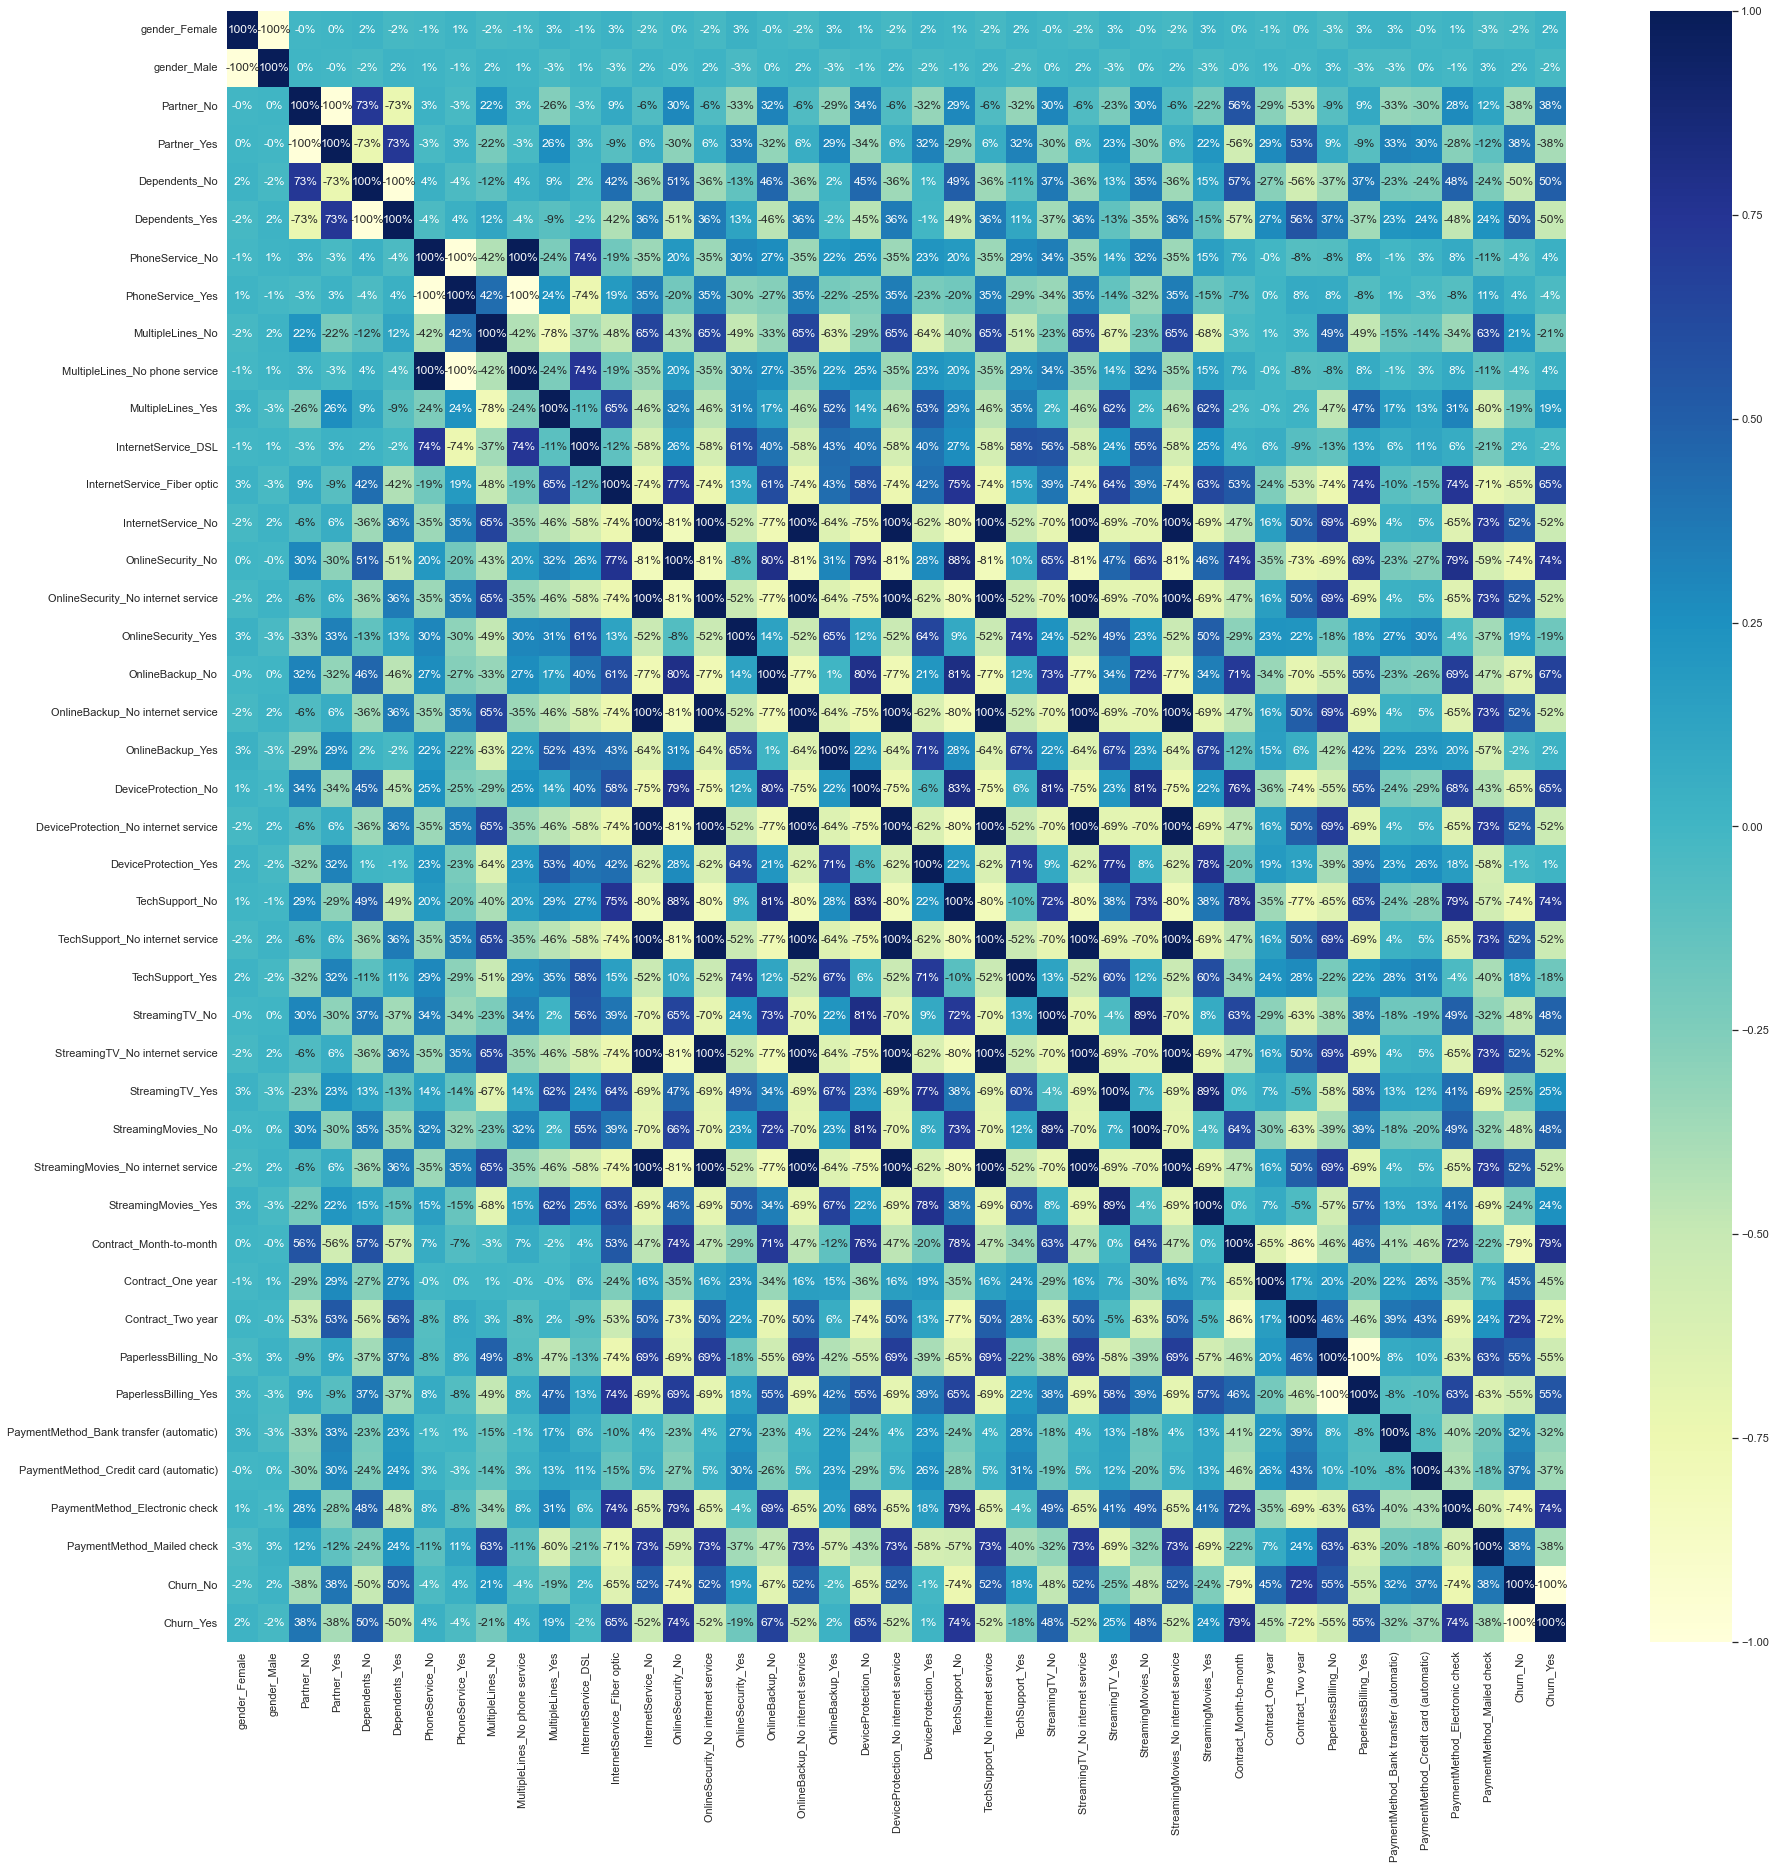

In [31]:
dummies = pd.get_dummies(data[cat_columns]).corr()
plt.figure(figsize=(30,30))
sns.heatmap(dummies.corr(), annot=True,mask=None, cmap='YlGnBu',fmt='.0%', )
plt.show()
# Sumber : Pandas Dokumentasi Get Dummies

berdasarkan hasil heatmap juga didapatkan bahwa feature gender dan feature phone service tidak memiliki korelasi yang kuat terhadap feature target, oleh karena kolom tersebut dapat dihapuskan

In [32]:
#Mengubah value pada kolom churn menjadi Binary
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

# **V. *Data Preprocessing***

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi *data inference*, transformasi data (*encoding*, dll.), dan proses-proses lain yang dibutuhkan.

## **A. *Get Data for Model Inference***

Tahapan ini digunakan untuk menyimpan beberapa dataset sebagai sample yang kemudian nantinya model yang sudah terbentuk akan diuji menggunakan model inference ini. dan untuk mengetahui apakah model yang terbuat sudah sesuai dengan kondisi nyatanya.

In [33]:
data_inf = data.sample(20, random_state=29) # no random state dipilih secara acak
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6698,Male,0,No,No,40,Yes,No,Fiber optic,No,Yes,No,Yes,No,Yes,One year,Yes,Credit card (automatic),89.60,3488.15,0
6068,Female,0,No,Yes,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.55,480.60,1
1124,Male,0,No,No,12,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.05,593.05,0
2235,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.20,0
7025,Female,0,No,No,18,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.05,1679.40,0
4371,Male,0,Yes,Yes,13,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),24.50,343.60,0
6836,Male,1,Yes,No,6,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.20,519.15,1
831,Male,0,Yes,Yes,38,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.05,963.95,0
4568,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Electronic check,85.20,2184.60,0
271,Male,0,Yes,No,57,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Electronic check,59.75,3450.15,0


In [34]:
X_train = data.drop(data_inf.index) # mengeluarkan data inference dari data train
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [35]:
X_train.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,40,Yes,No,Fiber optic,No,Yes,No,Yes,No,Yes,One year,Yes,Credit card (automatic),89.60,3488.15,0
1,Female,0,No,Yes,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.55,480.60,1
2,Male,0,No,No,12,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.05,593.05,0
3,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.20,0
4,Female,0,No,No,18,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.05,1679.40,0
5,Male,0,Yes,Yes,13,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),24.50,343.60,0
6,Male,1,Yes,No,6,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.20,519.15,1
7,Male,0,Yes,Yes,38,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.05,963.95,0
8,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Electronic check,85.20,2184.60,0
9,Male,0,Yes,No,57,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Electronic check,59.75,3450.15,0


## ***B. Splitting Dataset***

Tahapan ini digunakan membagi Data Train yang sebelumnya telah dibuat kemudian membaginya menjadi X_train, X_test, y_train, y_test

In [36]:
# Split between `X` (Features) and `y` (Target)
X = X_train.drop('Churn', axis=1)
y = X_train['Churn']
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7019,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7020,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7021,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [37]:
# Membagi Train-Set and Test-Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (5618, 19)
Test Size  :  (1405, 19)


Pada data train teriri atas 5618 rows dan 19 kolom sementara pada data test size terdiri atas 1405 rows dan 19 kolom

## **C. *Feature Selection***

In [38]:
data.columns #menampilkan kolom yang tersedia pada dataframe [data]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Berdasarkan hasil EDA pada tahapan sebelumnya maka didapatkan bahwa feature gender dan Phone Services tidak memiliki korelasi oleh karena itu kita dapat menghapus kolom tersebut

In [39]:
select_feature =['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'] #memilih feature selain feature gender dan phone service

In [40]:
X_train_fix=X_train[select_feature]
X_test=X_test[select_feature]
X_train_fix

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5102,1,No,No,50,Yes,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,83.40,4113.70
1653,0,Yes,Yes,50,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.80
280,0,No,No,10,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,51.20,498.25
4817,0,No,No,39,No phone service,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),41.10,1597.05
33,0,No,No,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,0,Yes,Yes,65,Yes,DSL,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),79.40,5071.90
2997,0,Yes,Yes,1,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
105,0,No,No,5,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.30,100.20
2467,0,No,No,47,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,4849.10


## **D. *Handling Missing Value***

Setelah membagi data train, data test, y train dan y test maka tahapan selanjutnya adalah mengecek missing value pada setiap data tersebut

In [41]:
# check missing values dalam dataset
pd.set_option('display.max_row', 21)
X_train_fix.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
dtype: int64

**Terdapat missing value pada feature `Total Charge`, oleh karena itu feature tersebut perlu dilakukan handling missing value**

In [42]:
X_train_fix[X_train_fix['TotalCharges'].isna()] #melihat informasi pada total charge yang terdapat missing value

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1336,0,Yes,Yes,0,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
751,0,No,Yes,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
933,0,Yes,Yes,0,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
4370,0,Yes,Yes,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
6739,0,No,Yes,0,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
3818,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
1079,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
6656,0,Yes,Yes,0,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
5206,0,Yes,Yes,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN


In [43]:
X_train_fix[X_train_fix['TotalCharges'].isna()].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,9.0,9.0,9.000000,0.0
mean,0.0,0.0,42.577778,NaN
std,0.0,0.0,25.194718,NaN
min,0.0,0.0,19.700000,NaN
25%,0.0,0.0,20.250000,NaN
50%,0.0,0.0,25.750000,NaN
75%,0.0,0.0,61.900000,NaN
max,0.0,0.0,80.850000,NaN


dikarenakan pada feature Total Charges tersebut distribusinya skew maka kita dapat mengimputasi pada baris yang memiliki missing value menggunakan Median pada kolom feature total charges tersebut. 

**Imputasi Total Charge Menggunakan Median**

In [44]:
X_train_fix['TotalCharges'] = X_train_fix['TotalCharges'].fillna(X_train_fix['TotalCharges'].median())

In [45]:
X_train_fix.isna().sum() #cek apakah masih terdapat missing value atau tidak

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Berdasarkan informasi diatas, sudah tidak terdapat missing value pada X_train

**Cek Missing Value pada X_test**

In [46]:
X_test.isna().sum() 

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

Pada X_test juga terdapat missing value, sehingga kita dapat melakukan langkah yang sama pada X_test seperti yang dilakukan pada X_train

In [47]:
X_test[X_test['TotalCharges'].isna()].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,2.0,2.0,2.000000,0.0
mean,0.0,0.0,36.200000,NaN
std,0.0,0.0,23.122392,NaN
min,0.0,0.0,19.850000,NaN
25%,0.0,0.0,28.025000,NaN
50%,0.0,0.0,36.200000,NaN
75%,0.0,0.0,44.375000,NaN
max,0.0,0.0,52.550000,NaN


In [48]:
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(X_test['TotalCharges'].median())

In [49]:
X_test.isna().sum() #mencheck apakah masih terdapat missing value atau tidak

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

**Sudah tidak terdapat missing value pada X_test**

**Cek Missing Value pada y_train dan y_test**

In [50]:
y_test.isna().sum()

0

In [51]:
y_train.isna().sum()

0

pada y_train dan y_test tidak terdapat missing value sehingga kita dapat melanjutkan ketahapan selanjutnya yaitu mensplit antara kolom numerik dan kategorik

## **F. *Split Between Numerical Coloumns and Categorical Coloumns***

Pada tahapan ini kita akan membagi antara kolom yang merupakan jenis kategori dan jenis numerik, dikarenakan pada tahapan awal kita sudah mengetahui bahwa tidak terdapat kolom yang bertipe kategori, maka kita tidak perlu lagi melakukan pembagian terhadap kolom kategori tersebut

In [52]:
# Memasukan kolom numerik kedalam variable num_columns
num_columns = X_train_fix.select_dtypes(include=np.number).columns.tolist()
print('Numerical Columns : ', num_columns)

# Mengidentifikasi Kategorik dalam cat_columns
cat_columns = X_train_fix.select_dtypes(include=['object']).columns.tolist()

print('Categorical Columns : ', cat_columns)


Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [53]:
# Mensplit dataset menjadi X_Train dan X_test untuk masing-masing jenis tipe data kategorik dan numerik

X_train_num = X_train_fix[num_columns]
X_train_cat = X_train_fix[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_cat

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5102,No,No,Yes,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1653,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic)
280,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check
4817,No,No,No phone service,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic)
33,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,Yes,Yes,Yes,DSL,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
2997,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check
105,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check
2467,No,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check


**Berdasarkan informasi diatas didapatkan bahwa masih terdapat kolom kategorik, sehingga value pada kolom tersebut akan diubah dalam bentuk numerik menggunakan encoding**

## **G. *Handling Outlier***

Pada Tahapan ini akan dilakukan handiling outlier, yang akan dilakukan hanya kepada kolom berjenis **`numerik dan hanya pada data Train`** atau tidak dilakukan pada data Inference

**Melihat Outlier pada setiap feature menggunakan boxplot**

SeniorCitizen skewness:  1.8336265823569755


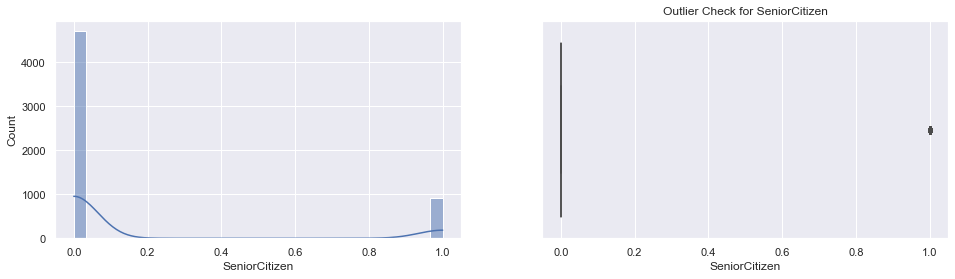

tenure skewness:  0.230397560189621


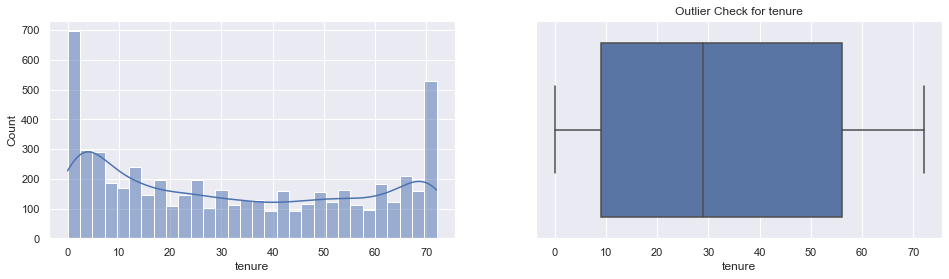

MonthlyCharges skewness:  -0.23406547459247182


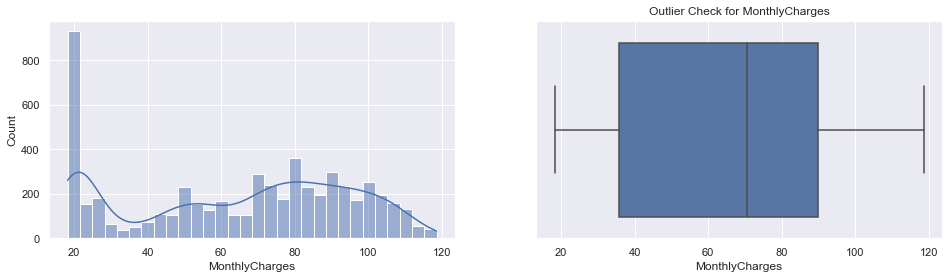

TotalCharges skewness:  0.9451047166778092


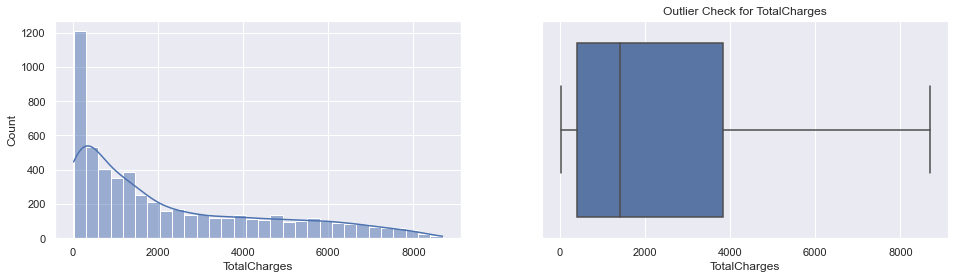

In [54]:
# Membuat Looping Function untuk memvisualisasi distribusi data dan box plot
for i in X_train_num.columns:
    # Define figure size
    plt.figure(figsize=(16, 4))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_num[i],bins=30,kde=True)
     # Boxplot
    plt.subplot(1, 2, 2)
    plt.title('Histogram of %s'%i)
    sns.boxplot(X_train_num[i])
    plt.title('Outlier Check for %s'%i)
    print('%s skewness: '%i,X_train_num[i].skew())
    plt.show()

**Berdasarkan hasil visualisai box plot dan distribusi data diatas didapatkan bahwa, pada keseluruhan feature numerik X_train tidak didapatkan outlier dan terdapat feature yang terdistribusi normal dan skew, untuk lebih memastikan dan menentukan tahapan dalam handling outlier maka akan dibuat tabel untuk menunjukan persentase outlier pada masing-masing feature**
Dengan ketentuan teknik handling outlier sebagai berikut, dimana:
- jika **outlier < 5%** maka akan **dihapus**
- jika **outlier >= 5% dan outlier < 15%** maka akan dilakukan **capping**
- jika **outlier >= 15%** maka akan **dibiarkan**

In [55]:
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [56]:
outlier_precentage_and_skew = pd.DataFrame(columns=['Feature','Outlier_Percentage','Skew','Mean','Median'])
for i in range(len(X_train_num.columns)):
    outlier_precentage_and_skew.loc[i] = [X_train_num.columns[i], round(upper_lower(X_train_num, X_train_num.columns[i]).shape[0] / X_train_num.shape[0] * 100, 2)
                                        ,X_train_num[X_train_num.columns[i]].skew(), X_train_num[X_train_num.columns[i]].mean(), X_train_num[X_train_num.columns[i]].median()]
outlier_precentage_and_skew.sort_values(by=['Outlier_Percentage'], ascending = False)

,Feature,Outlier_Percentage,Skew,Mean,Median
0,SeniorCitizen,16.22,1.833627,0.162157,0.000
1,tenure,0.00,0.230398,32.516732,29.000
2,MonthlyCharges,0.00,-0.234065,64.899181,70.475
3,TotalCharges,0.00,0.945105,2296.921102,1411.900


**Berdasarkan informasi diatas didapatkan bahwa tidak terdapat outlier selain pada feature Senior Citizen, pada feature tersebut akan diabaikan dikarenakan, feature tersebut bukan merupakan feature dengan tipe numerik, melainkan feature kategorik yang sudah dirubah bentuknya menjadi numerik, dan pada feature lainnya, tidak didapatkan outlier sehingga tahapan handling outlier tidak akan dilakukan**

## **G. *Feature Scaling, Encoding***

**Dikarenakan kita akan `menggunakan pipeline` maka pada tahapan Feature Scalling dan Encoding akan dimasukan kedalam flow yang terdapat pada pipeline, dan berdasarkan informasi yang sudah kita dapatkan sebelumnya, bahwa seluruh kolom sudah bertipe numerik, oleh karena itu tahapan encoding tidak diperlukan**

In [57]:
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)
X_train_final

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5102,1,50,83.40,4113.70,No,No,Yes,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1653,0,50,105.95,5341.80,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic)
280,0,10,51.20,498.25,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check
4817,0,39,41.10,1597.05,No,No,No phone service,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic)
33,0,1,20.20,20.20,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,0,65,79.40,5071.90,Yes,Yes,Yes,DSL,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
2997,0,1,89.15,89.15,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check
105,0,5,24.30,100.20,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check
2467,0,47,106.35,4849.10,No,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check


# **VI. *Model Definition***

# **Pipeline**

**Membuat tahapan dalam pipeline, yang berisikan preprocessing, hingga modeling data**

In [58]:
# melihat unique values di keseluruhan kategorikal kolom
for col in X_train_final:
    print(f'{col} : {X_train_final[col].unique()}')
    print() 

SeniorCitizen : [1 0]

tenure : [50 10 39  1 27 43 32 31  2 67  9 19 72 57 28 55  5 25 59 46 60 70 58 21
 30 40 35 26  7 47 56 71  3 22  8 20 13  4 63 61 66 11 33 53 51 18 68 23
 14 12 62 15 42 64 36 65 37 52 41 17 24 34 45 29 38 48 54 69 44 49  6 16
  0]

MonthlyCharges : [ 83.4  105.95  51.2  ...  48.65  51.15  68.1 ]

TotalCharges : [4113.7  5341.8   498.25 ...  100.2  4849.1  3603.45]

Partner : ['No' 'Yes']

Dependents : ['No' 'Yes']

MultipleLines : ['Yes' 'No' 'No phone service']

InternetService : ['Fiber optic' 'DSL' 'No']

OnlineSecurity : ['Yes' 'No' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Credit card (automatic)' 

In [59]:
 # Mengelompokan masing-masing kolom untuk perlakuan preprocessing terutama pada tahapan scalling dan encoding
categori_feature = ['Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
 'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
numeric_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] 

In [60]:
numeric_transformer_sc = Pipeline([("scaler", StandardScaler())])
cat_transformer_sc = Pipeline([("cat", OneHotEncoder(handle_unknown="ignore"))])

**Kolom yang terdapat pada data train akan dilakukan scalling menggunakan Standar Scaller dan untuk kolom kategorik akan dilakukan one hot encoding**

In [61]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_sc, numeric_features),
        ("cat", cat_transformer_sc, categori_feature),
    ]
)

**Membuat SMOTE**

Berdasarkan informasi awal didapatkan bahwa pada kolom target, distribusinya datanya imbalanced oleh karena itu kita dapat mengatasi data imbalanced tersebut menggunakan smote

In [62]:
smote = SMOTE(random_state=42) 

**Membuat Pipeline pada setiap model**

Terdapat 6 model yang akan di uji untuk melihat, model dengan algoritma mana yang memiliki skor tertinggi yang kemudian akan dilakukan hyperparameter tuning pada model terpilih tersebut

In [63]:
# Logistic Regression Pipeline
logistic_pipe = Pipeline([('preprocessing', preprocessor),('smote', smote),('classifier', LogisticRegression())])
# Support Vector Machine Pipeline
svc_pipe = Pipeline([('preprocessing', preprocessor),('smote', smote), ('classifier', SVC())])
# Decision Tree Pipeline
tree_pipe = Pipeline([('preprocessing', preprocessor),('smote', smote), ('classifier', DecisionTreeClassifier())])
# Random Forest Pipeline
forest_pipe = Pipeline([('preprocessing', preprocessor),('smote', smote), ('classifier', RandomForestClassifier())])
# K-Nearest Neighbors Pipeline
knn_pipe = Pipeline([('preprocessing', preprocessor),('smote', smote), ('classifier', KNeighborsClassifier())])
# Naive Bayes Pipeline
naive_pipe = Pipeline([('preprocessing', preprocessor),('smote', smote), ('classifier', GaussianNB())])

# **VII. *Model Training***

### **A. Melakukan model training dengan menggunakan parameter default (baseline model) dari setiap algoritma**

Dikarenakan pada tahapan kita akan menggunakan parameter default, oleh karena itu kita tidak perlu mendefinisikan setiap parameter yang ada oleh setiap algoritma, dimana secara otomatis akan tersetting menjadi default pada keseluruhan parameter

In [64]:
# Menjalankan model training pada setiap algoritma
logistic_pipe.fit(X_train_final,y_train)
svc_pipe.fit(X_train_final,y_train)
tree_pipe.fit(X_train_final,y_train)
forest_pipe.fit(X_train_final,y_train)
knn_pipe.fit(X_train_final,y_train)
naive_pipe.fit(X_train_final,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Partner', 'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
    

### **B. Menggunakan `cross_val_score` untuk mencari akurasi `mean` dan `std` dari setiap model**

In [65]:
print('Cross Validation Accuracy Logistic Regresion = ', np.mean(cross_val_score(logistic_pipe, X_train_final, y_train, cv=5)))
print('Cross Validation Accuracy Support Vector Machine = ', np.mean(cross_val_score(svc_pipe, X_train_final, y_train, cv=5)))
print('Cross Validation Accuracy Decision Tree  = ', np.mean(cross_val_score(tree_pipe, X_train_final, y_train, cv=5)))
print('Cross Validation Accuracy Random Forest= ', np.mean(cross_val_score(forest_pipe, X_train_final, y_train, cv=5)))
print('Cross Validation Accuracy K-Nearest Neighbors = ', np.mean(cross_val_score(knn_pipe, X_train_final, y_train, cv=5)))
print('Cross Validation Accuracy Naive Bayes = ', np.mean(cross_val_score(naive_pipe, X_train_final, y_train, cv=5)))

Cross Validation Accuracy Logistic Regresion =  0.7515147529970244
Cross Validation Accuracy Support Vector Machine =  0.7538298216204055
Cross Validation Accuracy Decision Tree  =  0.7331783193847187
Cross Validation Accuracy Random Forest=  0.7760746665483595
Cross Validation Accuracy K-Nearest Neighbors =  0.6909945082281509
Cross Validation Accuracy Naive Bayes =  0.7029208113752246


In [66]:
scores = cross_val_score(logistic_pipe, X_train_final, y_train, cv=5)
scores2 = cross_val_score(svc_pipe, X_train_final, y_train, cv=5)
scores3 = cross_val_score(tree_pipe, X_train_final, y_train, cv=5)
scores4 = cross_val_score(forest_pipe, X_train_final, y_train, cv=5)
scores5 = cross_val_score(knn_pipe, X_train_final, y_train, cv=5)
scores6 = cross_val_score(naive_pipe, X_train_final, y_train, cv=5)

**Untuk mempermudah dalam penilaian pada setiap algoritma, maka dilakukan proses looping pada setiap algoritma tersebut**

In [67]:
#Menggunakan Looping untuk mempermudah dalam meliihat skor pada cross validation
model_name = [scores,scores2,scores3,scores4,scores5,scores6]
label = ['Logistic Regresion','Support Vector Machine','Decision Tree','Random Forest','K-Nearest Neighbors','Naive Bayes'] #label sesuai dengan jenis model
a = 0
for i in model_name:
    print(f'Cross Validation {label[a]}')
    print('scores= ', i)
    print('scores mean= ', i.mean())
    print('scores std = ', i.std())
    print('scores mean + scores std = ', i.mean()+i.std())
    print('scores mean - scores std = ', i.mean()-i.std())
    print(f'\n') # digunakan untuk pemisah per model
    a=a+1 

Cross Validation Logistic Regresion
scores=  [0.7633452  0.74021352 0.7411032  0.75512021 0.75779163]
scores mean=  0.7515147529970244
scores std =  0.009257171000397989
scores mean + scores std =  0.7607719239974224
scores mean - scores std =  0.7422575819966264


Cross Validation Support Vector Machine
scores=  [0.7544484  0.74733096 0.74377224 0.75601069 0.76758682]
scores mean=  0.7538298216204055
scores std =  0.008219293607059119
scores mean + scores std =  0.7620491152274645
scores mean - scores std =  0.7456105280133464


Cross Validation Decision Tree
scores=  [0.75978648 0.72775801 0.70996441 0.74354408 0.72929653]
scores mean=  0.7340699004636158
scores std =  0.016702107496285725
scores mean + scores std =  0.7507720079599015
scores mean - scores std =  0.71736779296733


Cross Validation Random Forest
scores=  [0.79270463 0.77491103 0.77758007 0.76491541 0.77382012]
scores mean=  0.7767862518736355
scores std =  0.00902503358691213
scores mean + scores std =  0.78581128546

In [68]:
Cross_Validation = pd.DataFrame(columns=['Model','scores mean', 'scores std', 'scores mean + scores std', 'scores mean - scores std'])
a = 0
for i in model_name:
    Cross_Validation.loc[a] = [label[a],round(i.mean(),3), round(i.std(),3), round(i.mean()+i.std(),3), round(i.mean()-i.std(),3)]
    a=a+1 
Cross_Validation.sort_values(by='scores mean', ascending=False)

,Model,scores mean,scores std,scores mean + scores std,scores mean - scores std
3,Random Forest,0.777,0.009,0.786,0.768
1,Support Vector Machine,0.754,0.008,0.762,0.746
0,Logistic Regresion,0.752,0.009,0.761,0.742
2,Decision Tree,0.734,0.017,0.751,0.717
5,Naive Bayes,0.703,0.007,0.709,0.696
4,K-Nearest Neighbors,0.691,0.005,0.696,0.686


**Berdasarkan Hasil Cross Validation kita mendapatkan model dengan nilai mean tertinggi yaitu model `Random Forest`, dengan score 0.775 dan berada pada rentang 0.768 - 0.782 dengan nilai std yang terendah kedua yaitu bernilai 0.07, namun setelah dilakukan hyperparameter pada Algoritma `Random Forest` tersebut, kita mendapatkan model yang overfit, oleh karena itu saya memilih untuk menggunakan model dengan algoritma `Support Vector Machine/SVC` yang kemudian model tersebut akan dilakukan hyperparameter tuning untuk menemukan best parameter pada algoritma model tersebut**

## **C. Hyperparameter Tuning pada algoritma terbaik**

Berdasarkan nilai pada cross validation didapatkan bahwa kita memilih model **`Support Vector Machine`** dimana model tersebut merupakan model dengan nilai skor terbaik kedua setelah random forest, tahapan selanjutnya adalah melakukan Hyperparameter Tuning pada algoritma terbaik tersebut dengan menggunakan `GridSearchCV() dan kemudian membandingkan performansi antara sebelum dan sesudah dilakukan Hyperparameter Tuning.


In [69]:
svc_params = {'classifier__C': [0.1, 1, 10], # mensetting hyperparameter pada Support Vector Machine
              'classifier__kernel': ['linear', 'rbf', 'poly'],
              'classifier__gamma': ['auto', 'scale']}

**Melakukan Grid Search pada algoritma model Support Vector Machine**

In [70]:
svc_best = GridSearchCV(svc_pipe, param_grid=svc_params, cv=5, verbose = 3, scoring='roc_auc') # scoring = roc auc dilakukan untuk mencari parameter dengan nilai roc auc terbaik
svc_best.fit(X_train_final,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear;, score=0.841 total time=   2.0s
[CV 2/5] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear;, score=0.848 total time=   2.2s
[CV 3/5] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear;, score=0.831 total time=   2.2s
[CV 4/5] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear;, score=0.839 total time=   2.1s
[CV 5/5] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=linear;, score=0.850 total time=   2.2s
[CV 1/5] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=rbf;, score=0.839 total time=   3.1s
[CV 2/5] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=rbf;, score=0.844 total time=   3.5s
[CV 3/5] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=rbf;, score=0.823 total time=   3.2s
[CV 4/5] END classifier__C=0

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('cat',
                                                                                          OneHotE

In [71]:
# Menampilkan hasil best parameter dan nilai cross validation pada berdasarkan hasil grid search
print("Best parameters: {}".format(svc_best.best_params_))
print("Best cross-validation score: {:.2f}".format(svc_best.best_score_))

Best parameters: {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'linear'}
Best cross-validation score: 0.84


**Berdasarkan hasil grid search didapatkan `'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'linear'` dan mendapatkan skor cross validation 0,84**

Tahapan selanjutnya adalah membandingkan performansi antara sebelum dan sesudah dilakukan Hyperparameter Tuning, yang akan ditampilkan pada tahapan model evaluation

# **VIII. *Model Evaluation***

Pada bagian ini, dilakukan evaluasi model dengan menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. disertakan visualisasi tren performa dan/atau tingkat kesalahan model, melakukan analisis terkait dengan hasil pada model dan menuliskan hasil analisis tersebut, untuk evaluasi yang akan dilakukan Metric evaluation yang akan digunakan adalah **F1-score** dan **ROC-AUC** score untuk memastikan bahwa model dapat memprediksi secara baik antara pengguna yang berpotensi Churn atau tidak.

**Variabel default (baseline) dan best parameter** untuk mempermudah dalam tahapan selanjutnya dan meminimalisir kesalahan tau pemanggilan variable, pada tahapan ini akan menampilkan nama variabel best param dan default

**`svc_pipe = adalah variable parameter default`**

**`svc_best = adalah variable best parameter berdasarkan grid search`**

In [72]:
# %timeit logistic_pipe.fit(X_train_final, y_train) # model tanpa hyperparameter (default)
# %timeit logistic_best.fit(X_train_final, y_train) # best paramater berdasarkan grid search

**Membuat dataframe untuk melihat evaluasi model**

untuk memudahkan dalam membandingkan antara model yang telah dilakukan hyperparameter tuning, maka akan dibuatkan dataframe yang berisikan informasi terkait score validation dan ROC.

In [73]:
evaluations = pd.DataFrame(columns=['model', 'training_score', 'validation_score', 'macro_f1_score', 'roc_auc_score'])

In [74]:
# Membuat data frame untuk model evaluasi
evaluations = pd.DataFrame(columns=['model', 'training_score', 'validation_score', 'macro_f1_score', 'roc_auc_score'])
evaluations.loc[0] = ['svc Hyperparameter Tuning', round(svc_best.score(X_train_final, y_train), 3), round(svc_best.score(X_test, y_test), 3), round(f1_score(y_test, svc_best.predict(X_test), average='macro'), 3), round(roc_auc_score(y_test, svc_best.predict(X_test)), 3)]
evaluations.loc[1] = ['svc Baseline/Parameter Default', round(svc_pipe.score(X_train_final, y_train), 3), round(svc_pipe.score(X_test, y_test), 3), round(f1_score(y_test, svc_pipe.predict(X_test), average='macro'), 3), round(roc_auc_score(y_test, svc_pipe.predict(X_test)), 3)]
evaluations

,model,training_score,validation_score,macro_f1_score,roc_auc_score
0,svc Hyperparameter Tuning,0.845,0.855,0.716,0.768
1,svc Baseline/Parameter Default,0.791,0.772,0.733,0.763


Menghitung **False Positive Rate** dan **True Positive Rate** menggunakan `roc_curve()` dan juga membuat list yang berisi confusion matrix untuk setiap model.

In [75]:
svc_false_positive_rate_val, svc_true_positive_rate_val, svc_thresholds_val = roc_curve(y_test, svc_best.predict(X_test)) # hyperparamater 
svc_default_false_positive_rate_val, svc_default_true_positive_rate_val, svc_default_thresholds_val = roc_curve(y_test, svc_pipe.predict(X_test)) # default
confusions = [confusion_matrix(y_test, svc_best.predict(X_test)), # hyperparamater 
            confusion_matrix(y_test, svc_pipe.predict(X_test))] # default

**Membuat Confusions Matrix untuk melihat accuracy,recall,precision dan f1 score**

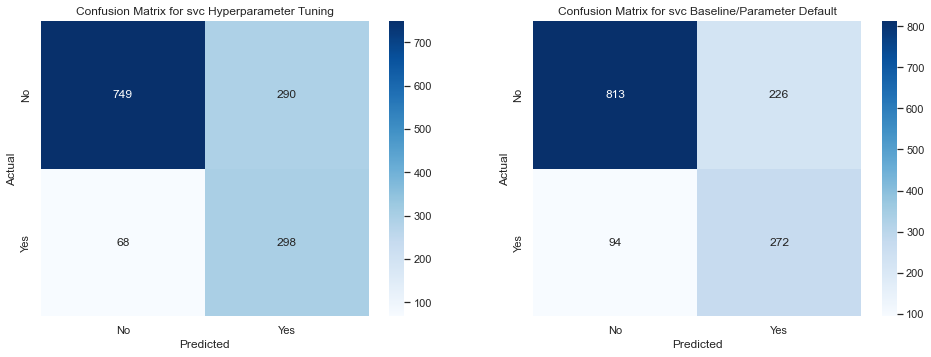

In [76]:
plt.figure(figsize=(25, 25))
for i in range(len(confusions)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions[i], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {evaluations.iloc[i, 0]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

In [77]:
print(classification_report(y_test, svc_best.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1039
           1       0.51      0.81      0.62       366

    accuracy                           0.75      1405
   macro avg       0.71      0.77      0.72      1405
weighted avg       0.81      0.75      0.76      1405



In [78]:
print(classification_report(y_test, svc_pipe.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1039
           1       0.55      0.74      0.63       366

    accuracy                           0.77      1405
   macro avg       0.72      0.76      0.73      1405
weighted avg       0.81      0.77      0.78      1405



**Insight Berdasarkan Classification Report dan Confusions Matrix**

Berdasarkan skor pada classifcation report, menunjukan bahwa model dengan hyperparameter tuning lebih baik dalam memprediksi, pengguna Churn, dan juga mendapatkan nilai yang lebih tinggi pada recall, secara umum perbedaan antara model yang sudah dituning dan default tidak terlihat perbedaan yang signifikan

**Membandingkan ROC_AUC**

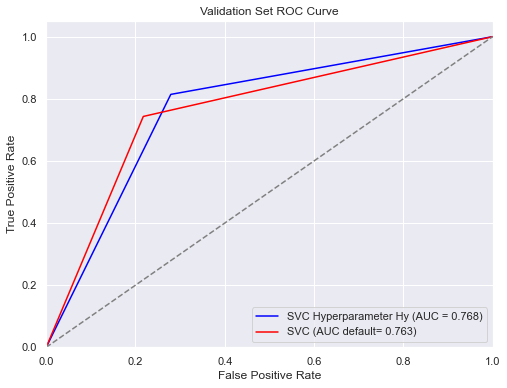

In [79]:
plt.figure(figsize=(8, 6))
plt.plot(svc_false_positive_rate_val, svc_true_positive_rate_val, color='blue', label=f'SVC Hyperparameter Hy (AUC = {roc_auc_score(y_test, svc_best.predict(X_test)):.3f})') #best hyperparameter
plt.plot(svc_default_false_positive_rate_val, svc_default_true_positive_rate_val, color='red', label=f'SVC (AUC default= {roc_auc_score(y_test, svc_pipe.predict(X_test)):.3f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curve')
plt.legend(loc="lower right")
plt.show()

jika melihat nilai score ROC AUC nya , SVC dengan hyperparameter tuning juga lebih baik nilainya dibandingkan dengan parameter baseline

In [80]:
evaluations.sort_values(by='roc_auc_score', ascending=False)

,model,training_score,validation_score,macro_f1_score,roc_auc_score
0,svc Hyperparameter Tuning,0.845,0.855,0.716,0.768
1,svc Baseline/Parameter Default,0.791,0.772,0.733,0.763


In [81]:
Cross_Validation.sort_values(by='scores mean', ascending=False) # hanya untuk menampilkan hasil model training untuk lebih memudahkan dalam menarik insight
# keseluruhan model yang digunakan menggunakan default parameter

,Model,scores mean,scores std,scores mean + scores std,scores mean - scores std
3,Random Forest,0.777,0.009,0.786,0.768
1,Support Vector Machine,0.754,0.008,0.762,0.746
0,Logistic Regresion,0.752,0.009,0.761,0.742
2,Decision Tree,0.734,0.017,0.751,0.717
5,Naive Bayes,0.703,0.007,0.709,0.696
4,K-Nearest Neighbors,0.691,0.005,0.696,0.686


**Evaluasi Terhadap Model dan Interpretasi terhadap data**

Dari hasil evaluasi pada 6 model diatas dapat diketahui `model dengan K-Nearest Neighbors merupakan model dengan nilai score cross validation terendah`, Berdasarkan cross validation juga didapatkan bahwa `model Support Vector Machine merupakan merupakan model dengan nilai cross validation tertinggi kedua dan dipilih sebagai algoritma yang akan dilakukan hyperparameter tuning pada tahapan selanjutnya`, pemilihan tersebut didasarkan oleh, model yang dihasilkan oleh algoritma SVC lebih baik goodfit dibandingkan Random Forest, dimana pada model Random Forest model yang terbentuk overfit

Berdasarkan hasil skoring dan pengujian model didapatkan bahwa, `model yang terbentuk baik berdasarkan paramater default ataupun dengan hyperparameter tuning`, kedua model tersebut `sudah cukup baik dalam melakukan prediksi` terhadap `Churn/target`, berdasarkan nilai yang dihasilkan didapatkan bahwa model `yang terbentuk good fit`, dimana `nilai` pada `training score dan test/validation score tidak berbeda jauh`, sehingga model dapat dikategorikan goodfit. 

Dalam pembentukan model ini saya ingin melihat model yang dapat memprediksi klasifikasi Churn yes/no secara akurat pada kedua jenis tersebut, jadi `metrik` yang perlu diperhatikan adalah `metrik roc auc ataupun f1 score`. alasan menggunakan metrik f1 score/roc auc score adalah, **kesalahan pada prediksi Churn, baik [yes/no] memiliki risiko yang sama sama tidak baik untuk perusahaan**, dengan mengetahui churn pengguna baik yang potensial churn atau tidak, kita dapat menentukan strategi dalam mengatasi permasalahan tersebut, diantaranya adalah yaitu dengan memberika promosi atau penawaran menarik terhadap customer yang potensial churn baik berupa promo penuruna harga langganan, dll. dan untuk pengguna yang tidak memiliki potensi churn maka kita harus dapat menjaga loyalitas pengguna tersebut, yaitu dengan tetap memberikan layanan yang terbaik kepada pengguna tersebut. kedua hal tersebut yang membuat akurasi prediksi pada kedua klasifikasi target tersebut sangat penting. sehingga diperlukan model yang dapat memprediksi kedua klasifikasi tersebut dengan balanced dan akurat. 

Jika dilihat dari **confusion matrix dari kedua model tersebut (Support Vector Machine default vs hyperparamater tuning)**, pada **model SVC hyperparamater tuning memiliki True Positive sedikit lebih banyak dari model SVC default**, tetapi model `SVC Hyperparameter` ini memiliki **Type 1 Error [Churn Yes]** `(False Negatif)` yang `jauh lebih sedikit` dari model `SVC default`, hal tersebut menunjukan bahwa model default lebih dapat meminimalisir kesalahan prediksi terhadap pengguna yang potensial Churn. Dan untuk `model SVC dengan hyperparameter memiliki skore ROC AUC lebih tinggi` dibandingkan dengan `SVC default`.

**Kekurangan dan Kelebihan Model**

Kekurangan yang terdapat pada model ini adalah nilai ROC/f1 skor masih belum optimal dan dapat ditingkatkan agar mendapatkan model dengan class excellent classification modelling

Kelebihan model ini adalah model sudah dapat memprediksi atau mengklasifikasikan target dengan cukup akurat dan balanced terhadap kedua jenis klasifikasi target, ditunjukan dengan nilai akurasi yang cukup tinggi dan nilai skor train set dan test set diatas >80% dan juga tidak terdapat perbedaan selisih nilai yang signifikan pada skore train dan test set tersebut sehingga model yang terbentuk dapat dikatakan goodfit, dan jika kita melihat berdasarkan skor ROC AUC model yang terbentuk sudah sangat baik, dengan nilai skor ROC AUC mencapai 0.768.


# **IX. *Model Testing (Inference Data)***

Pada bagian ini 2 model dengan yang sudah terbentuk akan diuji performansinya melalui prediksi terhadap data inference. hal tersebut dilakukan untuk menunjukan bahwa model yang terbentuk dapat memprediksi dengan baik terhadap data real world/inputan data baru, sehingga dapat memastikan bahwa model yang terbentuk bukan menghafal data train melainkan benar benar memprediksi melalui pola yang terbentuk

In [82]:
inference = data_inf.reset_index(drop=True) 
inference

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,40,Yes,No,Fiber optic,No,Yes,No,Yes,No,Yes,One year,Yes,Credit card (automatic),89.60,3488.15,0
1,Female,0,No,Yes,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.55,480.60,1
2,Male,0,No,No,12,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.05,593.05,0
3,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.20,0
4,Female,0,No,No,18,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.05,1679.40,0
5,Male,0,Yes,Yes,13,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),24.50,343.60,0
6,Male,1,Yes,No,6,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.20,519.15,1
7,Male,0,Yes,Yes,38,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.05,963.95,0
8,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Electronic check,85.20,2184.60,0
9,Male,0,Yes,No,57,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Electronic check,59.75,3450.15,0


In [83]:
X_test_inf= inference.drop(['Churn'], axis=1)  # memisahkan kolom target pada data inference
y_test_inf = inference['Churn']

**Melakukan prediksi terhadap data inference**

In [84]:
svc_pred = pd.DataFrame(svc_best.predict(X_test_inf)) #hyperparameter tuning
svc_pred_default = pd.DataFrame(svc_pipe.predict(X_test_inf)) #default

**Menggabungkan hasil prediksi 2 model SVC dan terhadap nilai Actual**

In [85]:
predictions = pd.concat([inference['Churn'], svc_pred, svc_pred_default], axis=1)
predictions.columns = ['Actual','svc hyperparamater','svc_default']
predictions

,Actual,svc hyperparamater,svc_default
0,0,0,0
1,1,1,1
2,0,1,1
3,0,0,0
4,0,1,1
5,0,0,0
6,1,1,1
7,0,0,0
8,0,0,0
9,0,0,0


**Membuat dataframe `Inference Testing` yang menyimpan score dari setiap model terhadap Inference test set.**

In [86]:
Inference_Testing = pd.DataFrame(columns=['model', 'Inference_Testing_score', 'macro_f1_score', 'roc_auc_score'])
Inference_Testing.loc[0] = ['svc hyper parameter', svc_best.score(X_test_inf, y_test_inf), f1_score(y_test_inf, svc_best.predict(X_test_inf), average='macro'), roc_auc_score(y_test_inf, svc_best.predict(X_test_inf))]
Inference_Testing.loc[1] = ['svc default', svc_pipe.score(X_test_inf, y_test_inf), f1_score(y_test_inf, svc_pipe.predict(X_test_inf), average='macro'), roc_auc_score(y_test_inf, svc_pipe.predict(X_test_inf))]

Menghitung **False Positive Rate** dan **True Positive Rate** menggunakan `roc_curve()` untuk setiap model pada Inference Testing.

In [87]:
svc_false_positive_rate_inf, svc_true_positive_rate_inf, svc_thresholds_inf = roc_curve(y_test_inf, svc_best.predict(X_test_inf)) # hyperparamater 
svc_default_false_positive_rate_inf, svc_default_true_positive_rate_inf, svc_default_thresholds_inf = roc_curve(y_test_inf, svc_pipe.predict(X_test_inf)) # default

**Membuat Plotting ROC**

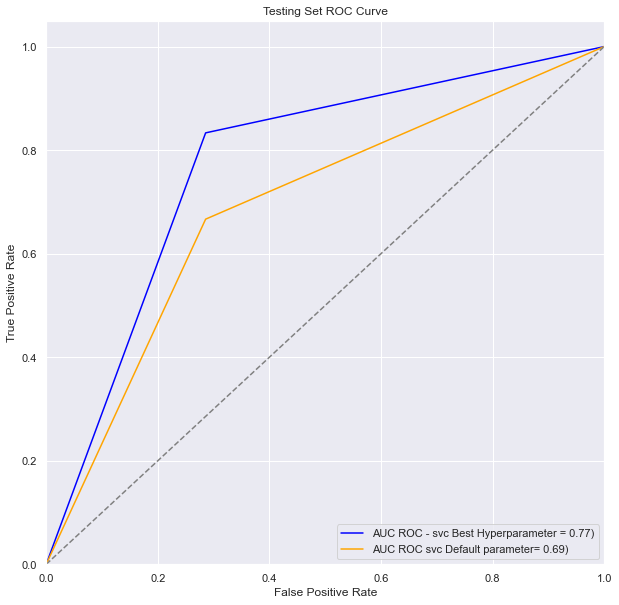

In [88]:
plt.figure(figsize=(10, 10))
plt.plot(svc_false_positive_rate_inf, svc_true_positive_rate_inf, color='blue', label=f'AUC ROC - svc Best Hyperparameter = {(roc_auc_score(y_test_inf, svc_best.predict(X_test_inf))):.2f})')
plt.plot(svc_default_false_positive_rate_inf, svc_default_true_positive_rate_inf, color='orange', label=f'AUC ROC svc Default parameter= {(roc_auc_score(y_test_inf, svc_pipe.predict(X_test_inf))):.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Set ROC Curve')
plt.show()

In [89]:
Inference_Testing.sort_values(by='roc_auc_score', ascending=False)

,model,Inference_Testing_score,macro_f1_score,roc_auc_score
0,svc hyper parameter,0.869048,0.733333,0.773810
1,svc default,0.700000,0.670330,0.690476


**Berdasarkan hasil testing terhadap dataset inference didapatkan bahwa, model SVC dengan hyperparameter jauh lebih baik dapat memprediksi dengan benar pada dataset inference, ditunjunakan dengan nilai ROC_AUC score yang jauh lebih tinggi dan juga nilai inference testing score, Hal tersebut menunjukan bahwa SVC model dengan hyperparameter merupakan model terbaik**

# **X.Kesimpulan**

Pada Tahapan ini kita akan mengambil kesimpulan terkait model yang sudah kita buat dan sudah diuji , serta apa saja insight yang terdapat pada dataset tersebut.

In [90]:
X_train_final.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Partner',
       'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Kesimpulan yang dapat ditarik dari hasil EDA dan pemodelan dengan menggunakan 6 model klasifikasi yang berbeda ini adalah:

Dataset yang digunakan ini adalah dataset terkait pelanggan Telco yang memberikan informasi terkait seberapa besar pengguna yang akan meninggalkan perusahaan/kehilangan customer dalam sebulan terakhir (churn). pada dataset ini berisi informasi tentang layanan pelanggan, akun, dan data demografis setiap pengguna.

Informasi yang terdapat pada dataset ini yaitu **Pelanggan Telco Customer ini tidak didominasi pria/wanita melainkan distribusinya seimbang** kebanyakan customer yang potensial churn merupakan customer yang **tidak memiliki pasangan**, dan berdasarkan informasi yang didapatkan , pengguna pada perusahaan ini merupakan kalangan muda atau bukan **SeniorCitizen**, dimana pada kalangan yang termasuk SeniorCitizen memiliki tingkat churn lebih tinggi. Kita juga dapat mengetahui bahwa **pengguna yang tidak memiliki akses internet cenderung** memiliki **persentase churn yang lebih rendah**, pengguna yang memiliki akses layanan online backup tingkat churn-nya cenderung lebih rendah dibandingkan pengguna yang tidak memiliki layanan online backup, hal tersebut juga terjadi pada feature device protection dan tech support. dapat disimpulkan bahwa dukungan **pelanggan/fitur tambahan merupakan tindakan yang baik untuk mencegah perusahaan kehilangan pelanggan/churn**. fitur tambahan tersebut juga dapat memungkinkan menarik lebih banyak pelanggan.

Terdapat juga informasi bahwa para pelanggan/customer cenderung lebih senang melakukan pembayaran melalui non paperless billing/online, dengan metode pembayaran melalui elektronik check, pada metode pembayaran tersebut juga memiliki tingkat churn yang tinggi, sedangkan pada pembayaran metoda lainnya yaitu mailed check, bank transfer dan credit card, kecenderungan churn ratenya jauh lebih rendah. para customer tersebut rata - rata memiliki contract jangka pendek (month to month) dan hanya beberapa/sebagian sisanya yang memiliki kontrak jangka panjang/langganan dalam pengunaan jangka panjang, lamanya waktu langganan tersebut berkorelasi negatif terhadap feature churn, dimana semakin lama pengguna berlangganan maka tingkat churnnya akan semakin menurun/rendah. berdasarkan beberapa informasi tersebut maka perusahaan berusaha untuk mengetahui **Variabel/feature mana yang merupakan faktor terkuat dari yang mempengaruhi churn customer**, baik yang memiliki potensi untuk churn ataupun tidak. sehingga perusahaan dapat lebih mudah dalam menentukan strategi / kebijakan terkait menjaga jumlah customer dan menarik customer lainnya untuk menggunakan jasa pada perusahaan tersebut, baik berupa promosi yang tepat kepada pengguna yang memiliki loyalitas tinggi terhadap perusahaan tersebut, ataupun terhadap pengguna yang dirasa **memiliki potensi untuk pindah ke layanan pada perusahaan lainnya (Churn)**. setelah dilakukan **EDA** dan dilihat korelasi antara tiap feature terhadap labelnya, **kolom-kolom yang akan digunakan sebagai features adalah** `'SeniorCitizen','Partner','Dependents','tenure','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges', dan 'TotalCharges'`. 

Setelah melalui tahapan EDA dan feature selection tahapan selanjutnya adalah membuat model, didapatkan 1 model klasifikasi dengan performa paling baik diantara 6 model lainnya yaitu model **Support Vector Machine**, setelah mendapatkan model tersebut lalu dilakukan hyper parameter pada model tersebut dan kita mendapatkan performansi pada kedua model tersebut yaitu :
- **Model 1 : Support Vector Machine default** dengan average **f1-score 0.733** dan **ROC AUC 0.763**
- **Model 2 : Support Vector Machine dengan Hyper Parameter** dengan average **f1-score 0.716** dan **ROC AUC 0.768**
Kedua model tersebut tidak memiliki perbedaan yang signifikan, lalu untuk memastikan bahwa model yang didapat benar benar dapat memprediksi dengan baik, maka kita lakukan uji testing pada data inference dan didapatkan bahwa **model Support Vector Machine dengan Hyper Parameter** merupakan **model dengan performance terbaik** dimana berdasarkan hasil uji tersebut didapatkan **model goodfit** dengan **nilai test score sebesar 0.86** **f1-score 0.73** dan **ROC AUC 0.77** yang menggambarkan bahwa model sudah cukup baik dalam mengklasifikasikan setiap target. adapun hyperparameter untuk model performance terbaik tersebut adalah `hyper parameter terbaik yaitu : 'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'linear'`. Berdasarkan hasil evaluasi dan skoring pada model tersebut, kita dapat menyimpulkan **bahwa model yang dibuat sudah cukup mampu untuk melakukan prediksi terhadap default payment pengguna kartu kredit, namun masih memerlukan beberapa peningkatan pada model tersebut**

**Model Metriks**
dikarenakan data yang imbalanced pada kolom target maka pada model ini perlu ditekankan kepada metriks precision atau akurasi pada target 1 [Churn = Yes], dan setelah melalui beberapa tahapan, saya lebih memilih model dengan metriks yang balanced yaitu dengan melihat nilai ROC_AUC sebagai metriks yang perlu diperhatikan. pada tahapan ini juga kita telah melakukan tahapan SMOTE untuk mengatasi permasalahan Imbalanced tersebut, sehingga model yang dihasilkan menjadi lebih baik dalam memprediksi

**Kelemahan dan Kekurangan Model**
Kekurangan yang terdapat pada model ini adalah nilai ROC/f1 skor masih belum optimal dan dapat ditingkatkan agar mendapatkan model dengan class excellent classification modelling

Kelebihan model ini adalah model sudah dapat memprediksi atau mengklasifikasikan target dengan cukup akurat dan balanced terhadap kedua jenis klasifikasi target, ditunjukan dengan nilai akurasi yang cukup tinggi dan nilai skor train set dan test set diatas >80% dan juga tidak terdapat perbedaan selisih nilai yang signifikan pada skore train dan test set tersebut sehingga model yang terbentuk dapat dikatakan goodfit, dan jika kita melihat berdasarkan skor ROC AUC model yang terbentuk sudah sangat baik, dengan nilai skor ROC AUC mencapai 0.768.

**NOTE**: hanya model SVM yang memakai hyperparameter terbaik berdasarkan grid search.

# **Save Model**

Pada bagian ini model yang memiliki score paling tinggi akan disimpan ke dalam file `.pkl`, model yang memiliki score tertinggi adalah model **Support Vector Machine**.

In [91]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(svc_best, model_file)